# SYMBOLIC STUDY
## **DOUBLE WISHBONE BELL-CRANK PUSH-ROD**
------------------------------------------

### **IMPORTANT NOTES**
#### **COLAB Machine Setup**
If starting a new Colab session, Please open the [colab_setup.ipynb](https://colab.research.google.com/github/khaledghobashy/smbd/blob/master/examples/colab_setup.ipynb) and follow the instructions there.
A new Colab session does not mean a new notebook session, you can have various notebook sessions on the same Colab session. The Colab session linked to your Google account expires in 12 hours, and so any data saved on that remote machine will be lost.</br>
When you run the first cell, Colab will prompt a warning that *"This notebook was not authored by Google."* and that it is loaded from GitHub. Un-check the **Reset all runtimes before running** then press **RUN ANYWAY**.

#### **Package Path.**
*This step is temporary unitll the package can be installed via conda and/or pip*
- **Colab**. </br>
For a Cloab session, the ```pkg_path``` variable is the one relevant to the repository path on the Colab remote machine. This should be used if you are running the notebook on Colab.
- **Local Machine**. </br>
The ```pkg_path``` variable is where I have the repository on my machine. You should change it to where you cloned the repository on your machine.

#### **Projects Directory**
- **Colab**.</br>
The ```projects_dir``` variable should not be changed.
- **Local Machine**. </br>
The ```projects_dir``` should be changed to match your desired directory where you store your projects.

--------------------------------------------------------------

## **SYSTEM DESCRIPTION**
-------------------------

### **Important Note**
The tool uses [euler-parameters](https://en.wikibooks.org/wiki/Multibody_Mechanics/Euler_Parameters) -which is a 4D unit quaternion- to represents bodies orientation in space. This makes the generalized coordinates used to fully define a body in space to be **7,** instead of **6**, it also adds an algebraic equation to the constraints that ensures the unity/normalization of the body quaternion. This is an important remark as the calculations of the degrees-of-freedom depends on it.

### **Summary**

### **Topology Layout**

---------------------------------------------------------------
---------------------------------------------------------------

## **SYMBOLIC TOPOLOGY**
------------------------

In this section, we create the symbolic topology that captures the topological layout that we just discussed.</br>
Defining the topology is very simple. We start by importing the ```template_topology``` class and create a new instance that represents our symbolic model. Then we start adding the components we discussed earlier, starting by the bodies, then the joints, actuators and forces, and thats it.</br>
These components will be represented symbolically, and therefore there is no need for any numerical inputs at this step.

The system is stored in a form of a network graph that stores all the data needed for the assemblage of the system equations later. But even before the assemblage process, we can gain helpful insights about our system as well be shown.


-----------------------------------------------

In [1]:
import os
from uraeus.smbd.systems import template_topology, configuration

In [2]:
database_directory = os.path.abspath('../../')
model_name = 'dwb_bellcrank_push'

In [3]:
sym_model = template_topology(model_name)

### Adding Bodies

In [4]:
# Adding Bodies
# =============
sym_model.add_body('uca', mirror=True)
sym_model.add_body('lca', mirror=True)
sym_model.add_body('upright', mirror=True)
sym_model.add_body('pushrod', mirror=True)
sym_model.add_body('rocker', mirror=True)
sym_model.add_body('upper_strut', mirror=True)
sym_model.add_body('lower_strut', mirror=True)
sym_model.add_body('tie_rod', mirror=True)
sym_model.add_body('hub', mirror=True)
sym_model.add_body('steer', mirror=True, virtual=True)
sym_model.add_body('chassis', virtual=True)

### Adding Joints

In [5]:
sym_model.add_joint.spherical('uca_upright', 'rbr_uca', 'rbr_upright', mirror=True)
sym_model.add_joint.spherical('lca_upright', 'rbr_lca', 'rbr_upright', mirror=True)
sym_model.add_joint.spherical('tie_upright', 'rbr_tie_rod', 'rbr_upright', mirror=True)
sym_model.add_joint.spherical('prod_rocker', 'rbr_rocker', 'rbr_pushrod', mirror=True)

sym_model.add_joint.revolute('uca_chassis', 'rbr_uca', 'vbs_chassis', mirror=True)
sym_model.add_joint.revolute('lca_chassis', 'rbr_lca', 'vbs_chassis', mirror=True)
sym_model.add_joint.revolute('hub_bearing', 'rbr_upright', 'rbr_hub', mirror=True)
sym_model.add_joint.revolute('rocker_chassis', 'rbr_rocker', 'vbs_chassis', mirror=True)

sym_model.add_joint.universal('prod_uca', 'rbr_uca', 'rbr_pushrod', mirror=True)
sym_model.add_joint.universal('strut_chassis', 'rbr_upper_strut', 'vbs_chassis', mirror=True)
sym_model.add_joint.universal('strut_rocker', 'rbr_lower_strut', 'rbr_rocker', mirror=True)
sym_model.add_joint.universal('tie_steering', 'rbr_tie_rod', 'vbr_steer', mirror=True)

sym_model.add_joint.cylinderical('strut', 'rbr_upper_strut', 'rbr_lower_strut', mirror=True)


### Adding Actuators

In [7]:
#

### Adding Forces

In [6]:
sym_model.add_force.internal_force('strut', 'rbr_upper_strut', 'rbr_lower_strut', mirror=True)
sym_model.add_force.generic_force('tire', 'rbr_hub', mirror=True)
sym_model.add_force.generic_force('drive', 'rbr_hub', mirror=True)


### **SYMBOLIC CHARACTERISTICS**

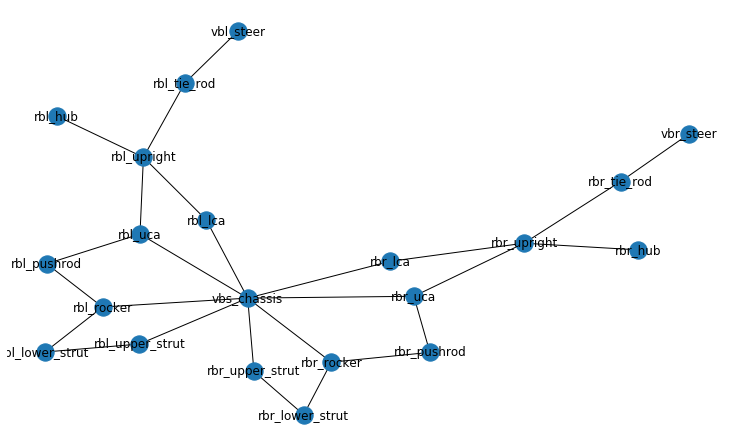

In [7]:
sym_model.topology.draw_constraints_topology()

### **ASSEMBLING**

This is the last step of the symbolic building process, where we make the system starts the assemblage process of the governing equations, which will be used then in the code generation for the numerical simulation, and also can be used for further symbolic manipulations.</br>

*Note: The equations' notations will be discussed in the tool documentation files.*

In [8]:
sym_model.save('objects')
sym_model.assemble()

---------------------------------------------------------------
---------------------------------------------------------------

## **SYSTEM CONFIGURATION**
---------------------------

In this step we define a symbolic configuration of our symbolic topology. As you may have noticed in the symbolic topology building step, we only cared about the *'topology'*, thats is the system bodies and their connectivity, and we did not care explicitly with how these components are configured in space.</br>
In order to create a valid numerical simulation session, we have to provide the system with its numerical configuration needed, for example, the joints' locations and orientations. The symbolic topology in its raw form will require you to manually enter all these numerical arguments, which can be cumbersome even for smaller systems. This can be checked by checking the configuration inputs of the symbolic configuration as ```config._config.input_nodes```

Here we start by stating the symbolic inputs we wish to use instead of the default inputs set, and then we define the relation between these newly defined arguments and the original ones. The details of this process will be provided in the documentation.

In [9]:
config_name = '%s_cfg'%model_name
sym_config = configuration(config_name, sym_model)

### CONFIGURATION INPUTS

In [10]:
# Adding UserInputs
# =================
sym_config.add_point.UserInput('ucaf', mirror=True)
sym_config.add_point.UserInput('ucar', mirror=True)
sym_config.add_point.UserInput('ucao', mirror=True)

sym_config.add_point.UserInput('lcaf', mirror=True)
sym_config.add_point.UserInput('lcar', mirror=True)
sym_config.add_point.UserInput('lcao', mirror=True)

sym_config.add_point.UserInput('tro', mirror=True)
sym_config.add_point.UserInput('tri', mirror=True)

sym_config.add_point.UserInput('rocker_chassis', mirror=True)
sym_config.add_point.UserInput('pushrod_rocker', mirror=True)
sym_config.add_point.UserInput('pushrod_uca', mirror=True)

sym_config.add_point.UserInput('strut_chassis', mirror=True)
sym_config.add_point.UserInput('strut_rocker', mirror=True)

sym_config.add_point.UserInput('wc', mirror=True)
sym_config.add_point.UserInput('wc1', mirror=True)
sym_config.add_point.UserInput('wc2', mirror=True)

sym_config.add_vector.UserInput('x')
sym_config.add_vector.UserInput('y')
sym_config.add_vector.UserInput('z')


#### SCALARS

In [11]:
sym_config.add_scalar.UserInput('strut_freelength')
sym_config.add_relation.Equal_to('far_strut_FL', ('s_strut_freelength',), mirror=True)

### CONFIGURATION RELATIONS

In [12]:
# OTHER POINTS
sym_config.add_point.Centered('strut_mid', ('hpr_strut_chassis', 'hpr_strut_rocker'), mirror=True)

# JOINTS CONFIGURATIONS

# Spherical Joints:
# =================
sym_config.add_relation.Equal_to('pt1_jcr_uca_upright', ('hpr_ucao',), mirror=True)
sym_config.add_relation.Equal_to('pt1_jcr_lca_upright', ('hpr_lcao',), mirror=True)
sym_config.add_relation.Equal_to('pt1_jcr_tie_upright', ('hpr_tro',), mirror=True)
sym_config.add_relation.Equal_to('pt1_jcr_prod_rocker', ('hpr_pushrod_rocker',), mirror=True)

# Rocker-Chassis Revolute Joint:
# ==============================
sym_config.add_relation.Oriented('ax1_jcr_rocker_chassis', ('hpr_rocker_chassis','hpr_pushrod_rocker','hpr_strut_rocker'), mirror=True)
sym_config.add_relation.Equal_to('pt1_jcr_rocker_chassis', ('hpr_rocker_chassis',), mirror=True)

# PushRod-UCA Universal Joint:
# ============================
sym_config.add_relation.Equal_to('pt1_jcr_prod_uca', ('hpr_pushrod_uca',), mirror=True)
sym_config.add_relation.Oriented('ax1_jcr_prod_uca', ('hpr_pushrod_uca','hpr_pushrod_rocker'), mirror=True)
sym_config.add_relation.Oriented('ax2_jcr_prod_uca', ('hpr_pushrod_rocker','hpr_pushrod_uca'), mirror=True)

# Upper Control Arm Revolute Joint:
# =================================
sym_config.add_relation.Centered('pt1_jcr_uca_chassis', ('hpr_ucaf','hpr_ucar'), mirror=True)
sym_config.add_relation.Oriented('ax1_jcr_uca_chassis', ('hpr_ucaf','hpr_ucar'), mirror=True)

# Lower Control Arm Revolute Joint:
# ================================
sym_config.add_relation.Centered('pt1_jcr_lca_chassis', ('hpr_lcaf','hpr_lcar'), mirror=True)
sym_config.add_relation.Oriented('ax1_jcr_lca_chassis', ('hpr_lcaf','hpr_lcar'), mirror=True)

# Wheel Hub Revolute Joint:
# =========================
sym_config.add_relation.Equal_to('pt1_jcr_hub_bearing', ('hpr_wc',), mirror=True)
sym_config.add_relation.Equal_to('ax1_jcr_hub_bearing', ('vcs_y',), mirror=True)

# Strut-Chassis Universal Joint:
# ==============================
sym_config.add_relation.Equal_to('pt1_jcr_strut_chassis', ('hpr_strut_chassis',), mirror=True)
sym_config.add_relation.Oriented('ax1_jcr_strut_chassis', ('hpr_strut_chassis','hpr_strut_mid'), mirror=True)
sym_config.add_relation.Oriented('ax2_jcr_strut_chassis', ('hpr_strut_mid','hpr_strut_chassis'), mirror=True)

# Strut-Rocker Universal Joint:
# =============================
sym_config.add_relation.Equal_to('pt1_jcr_strut_rocker', ('hpr_strut_rocker',), mirror=True)
sym_config.add_relation.Oriented('ax1_jcr_strut_rocker', ('hpr_strut_chassis','hpr_strut_rocker'), mirror=True)
sym_config.add_relation.Oriented('ax2_jcr_strut_rocker', ('hpr_strut_rocker','hpr_strut_chassis'), mirror=True)

# Tie-Steer Universal Joint:
# ==========================
sym_config.add_relation.Equal_to('pt1_jcr_tie_steering', ('hpr_tri',), mirror=True)
sym_config.add_relation.Oriented('ax1_jcr_tie_steering', ('hpr_tri','hpr_tro'), mirror=True)
sym_config.add_relation.Oriented('ax2_jcr_tie_steering', ('hpr_tro','hpr_tri'), mirror=True)

# Strut Cylinderical Joint:
# =========================
sym_config.add_relation.Equal_to('pt1_jcr_strut', ('hpr_strut_mid',), mirror=True)
sym_config.add_relation.Oriented('ax1_jcr_strut', ('hpr_strut_rocker','hpr_strut_chassis'), mirror=True)


# Strut Force Points:
# ===================
sym_config.add_relation.Equal_to('pt1_far_strut', ('hpr_strut_chassis',), mirror=True)
sym_config.add_relation.Equal_to('pt2_far_strut', ('hpr_strut_rocker',), mirror=True)


### CONFIGURATION GEOMETRIES

In [13]:
# GEOMETRIES
sym_config.add_scalar.UserInput('links_ro')
sym_config.add_scalar.UserInput('strut_outer')
sym_config.add_scalar.UserInput('strut_inner')
sym_config.add_scalar.UserInput('thickness')
sym_config.add_scalar.UserInput('hub_radius')

sym_config.add_geometry.Triangular_Prism('uca', ('hpr_ucaf','hpr_ucar','hpr_ucao','s_thickness'), mirror=True)
sym_config.assign_geometry_to_body('rbr_uca', 'gmr_uca', mirror=True)

sym_config.add_geometry.Triangular_Prism('lca', ('hpr_lcaf','hpr_lcar','hpr_lcao','s_thickness'), mirror=True)
sym_config.assign_geometry_to_body('rbr_lca', 'gmr_lca', mirror=True)

sym_config.add_geometry.Triangular_Prism('rocker', ('hpr_strut_rocker','hpr_pushrod_rocker','hpr_rocker_chassis','s_thickness'), mirror=True)
sym_config.assign_geometry_to_body('rbr_rocker','gmr_rocker',mirror=True)

sym_config.add_geometry.Triangular_Prism('upright', ('hpr_ucao','hpr_wc','hpr_lcao','s_thickness'), mirror=True)
sym_config.assign_geometry_to_body('rbr_upright', 'gmr_upright', mirror=True)

sym_config.add_geometry.Cylinder_Geometry('upper_strut', ('hpr_strut_chassis','hpr_strut_mid','s_strut_outer') , mirror=True)
sym_config.assign_geometry_to_body('rbr_upper_strut', 'gmr_upper_strut', mirror=True)

sym_config.add_geometry.Cylinder_Geometry('lower_strut', ('hpr_strut_mid','hpr_strut_rocker','s_strut_inner'), mirror=True)
sym_config.assign_geometry_to_body('rbr_lower_strut', 'gmr_lower_strut', mirror=True)

sym_config.add_geometry.Cylinder_Geometry('tie_rod', ('hpr_tri','hpr_tro','s_links_ro'), mirror=True)
sym_config.assign_geometry_to_body('rbr_tie_rod','gmr_tie_rod',mirror=True)

sym_config.add_geometry.Cylinder_Geometry('pushrod', ('hpr_pushrod_uca','hpr_pushrod_rocker','s_links_ro'), mirror=True)
sym_config.assign_geometry_to_body('rbr_pushrod', 'gmr_pushrod', mirror=True)

sym_config.add_geometry.Cylinder_Geometry('hub', ('hpr_wc1','hpr_wc2','s_hub_radius'), mirror=True)
sym_config.assign_geometry_to_body('rbr_hub', 'gmr_hub', mirror=True)

### ASSEMBLING

In [14]:
sym_config.export_JSON_file('config_inputs')